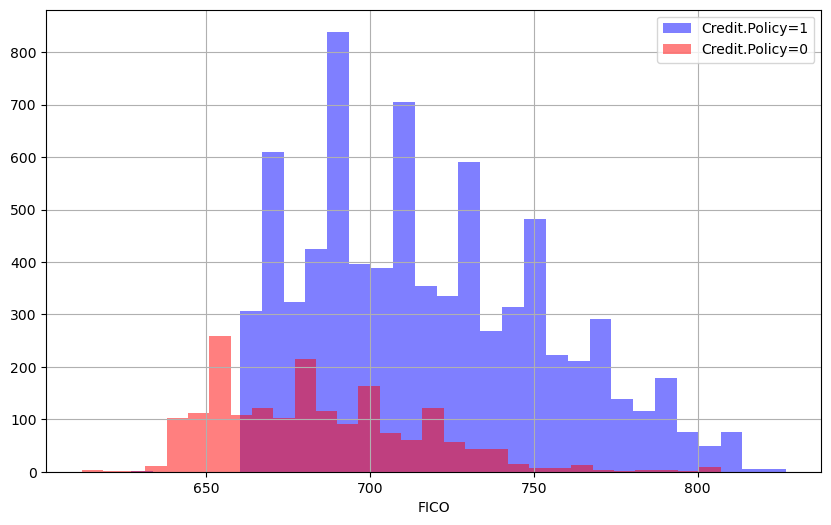

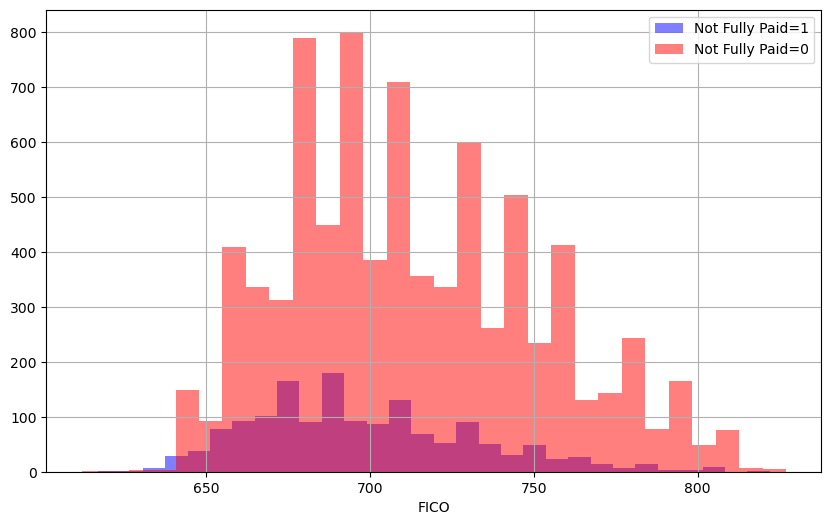

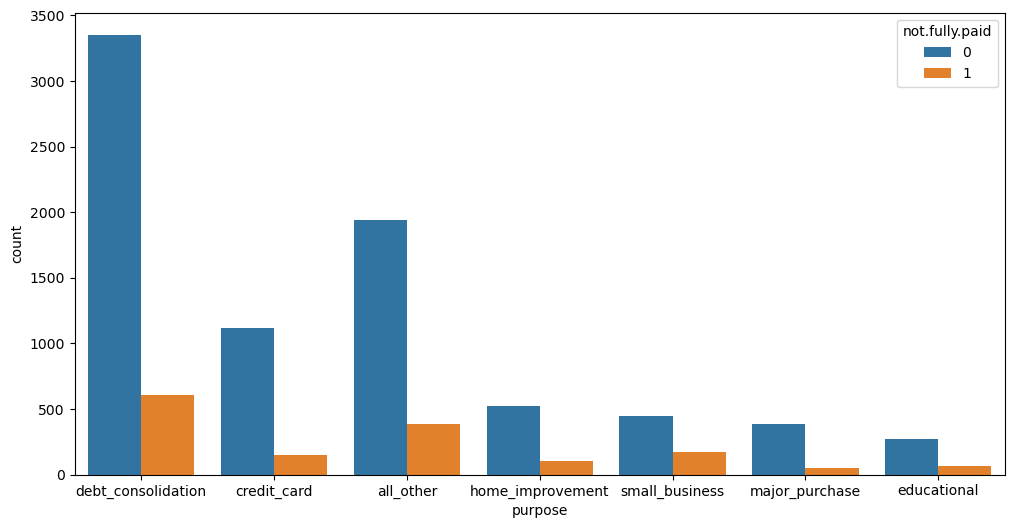

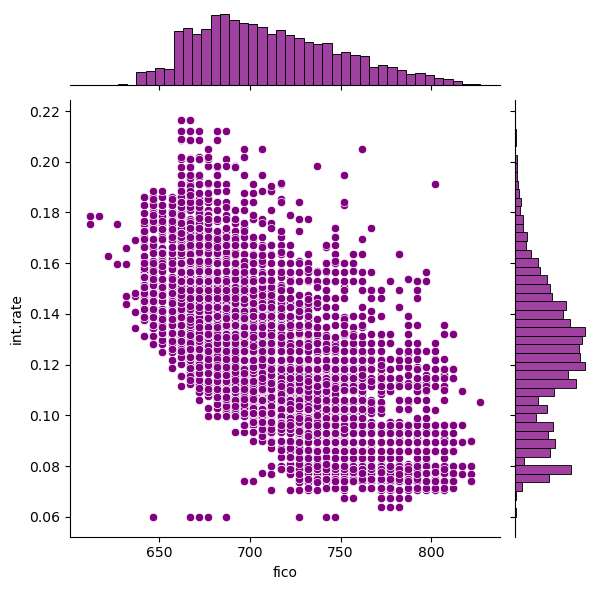

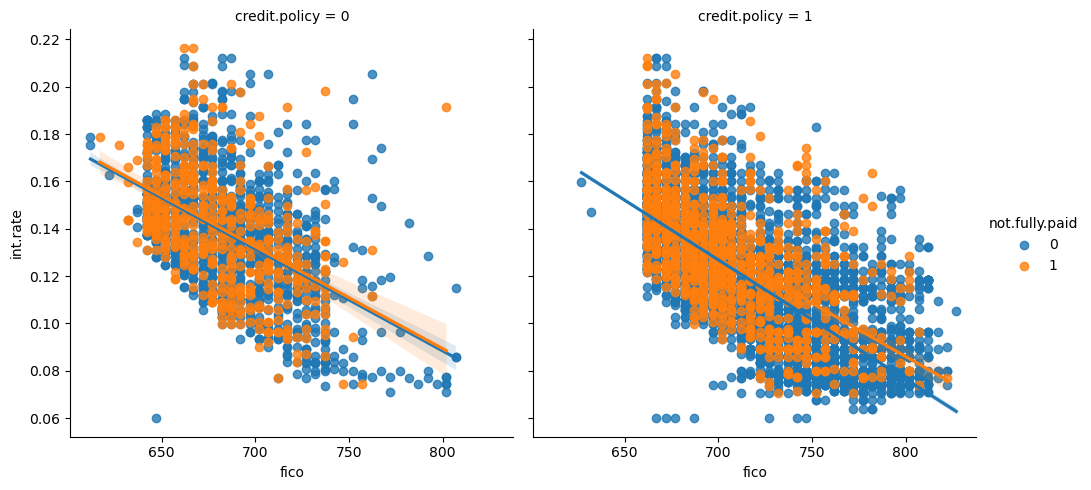

In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Get the Data
loans = pd.read_csv('loan_data.csv')

# Exploratory Data Analysis

# Histogram of FICO distributions by credit.policy
plt.figure(figsize=(10, 6))
loans[loans['credit.policy'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='Credit.Policy=1')
loans[loans['credit.policy'] == 0]['fico'].hist(alpha=0.5, color='red', bins=30, label='Credit.Policy=0')
plt.xlabel('FICO')
plt.legend()

# Histogram of FICO distributions by not.fully.paid
plt.figure(figsize=(10, 6))
loans[loans['not.fully.paid'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='Not Fully Paid=1')
loans[loans['not.fully.paid'] == 0]['fico'].hist(alpha=0.5, color='red', bins=30, label='Not Fully Paid=0')
plt.xlabel('FICO')
plt.legend()

# Countplot of loans by purpose with color hue defined by not.fully.paid
plt.figure(figsize=(12, 6))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid')

# Jointplot of FICO score and interest rate
sns.jointplot(data=loans, x='fico', y='int.rate', color='purple')

# lmplot to see the trend between FICO score, interest rate, not.fully.paid, and credit.policy
sns.lmplot(data=loans, x='fico', y='int.rate', hue='not.fully.paid', col='credit.policy')

# Setting up the Data
cat_feats = ['purpose']
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)


In [3]:

# Train Test Split
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training a Decision Tree Model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Predictions and Evaluation of Decision Tree
dtree_predictions = dtree.predict(X_test)
print(classification_report(y_test, dtree_predictions))
print(confusion_matrix(y_test, dtree_predictions))



              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874

[[1992  439]
 [ 337  106]]


In [4]:
# Training the Random Forest model
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

# Predictions and Evaluation
rfc_predictions = rfc.predict(X_test)
print(classification_report(y_test, rfc_predictions))
print(confusion_matrix(y_test, rfc_predictions))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.47      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874

[[2421   10]
 [ 434    9]]
